In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\hussa\Downloads\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Outliers Detection


{'whiskers': [<matplotlib.lines.Line2D at 0x22964677a30>,
 'caps': [<matplotlib.lines.Line2D at 0x22964696130>,
 'boxes': [<matplotlib.lines.Line2D at 0x229646776d0>,
 'medians': [<matplotlib.lines.Line2D at 0x229646967f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22964696b50>,
 'means': []}

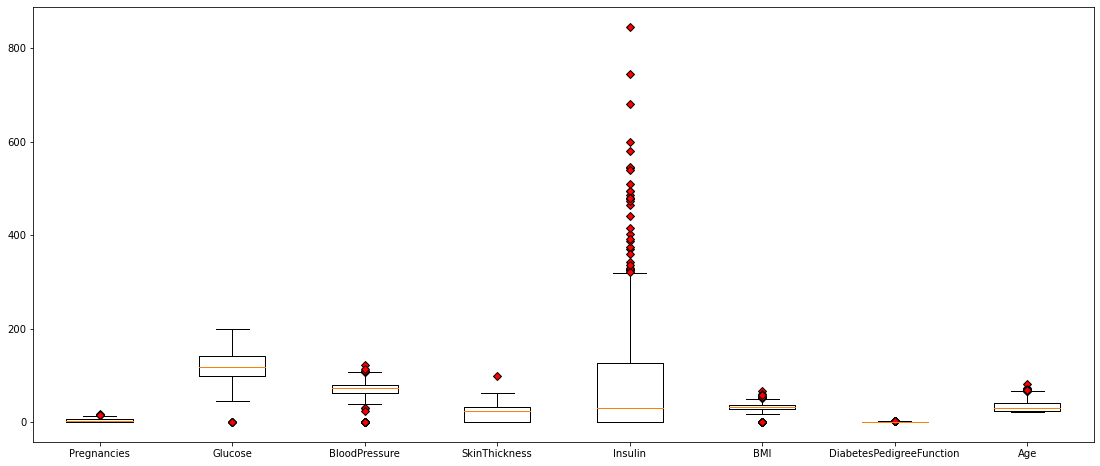

In [4]:
data = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(19,8))
plt.boxplot(data.values, labels=['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], flierprops=red_diamond)

*we can see that all the columns have outliers*


### Outliers Treatment

In [5]:
cols = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
df.shape

(639, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x229647d56a0>,
 'caps': [<matplotlib.lines.Line2D at 0x229647d5d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x229647d5340>,
 'medians': [<matplotlib.lines.Line2D at 0x229647e1460>,
 'fliers': [<matplotlib.lines.Line2D at 0x229647e17c0>,
 'means': []}

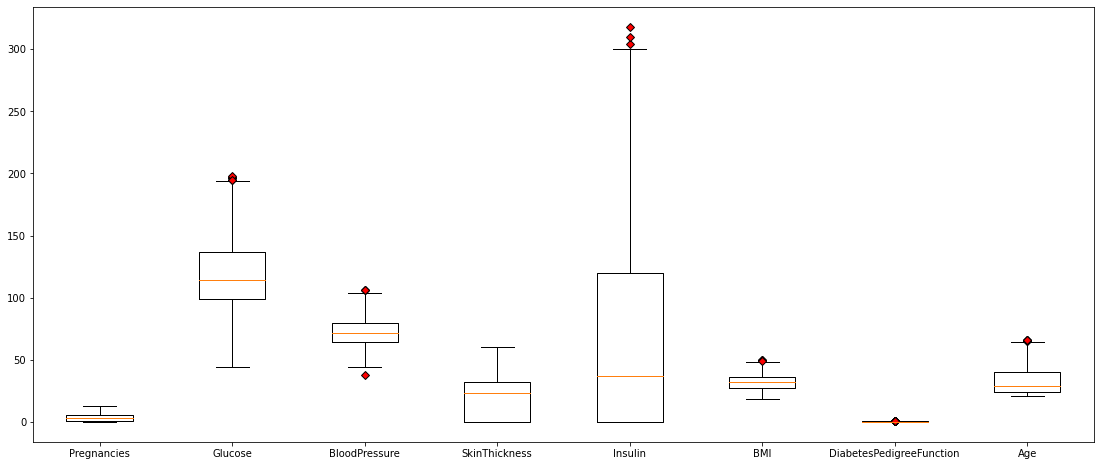

In [7]:
data = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(19,8))
plt.boxplot(data.values, labels=['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], flierprops=red_diamond)

# Data Exploration

### Descriptive Analysis

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [10]:
df.shape

(639, 9)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


## Missing Value Analysis

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Insulin'>

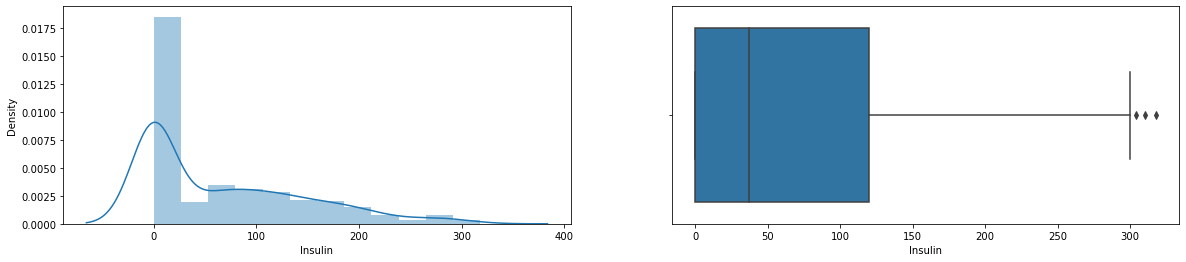

In [13]:
#Univariate analysis Insulin
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Insulin'])
f.add_subplot(1,2,2)
sns.boxplot(df['Insulin'])

- **The data contains alot of outliers the distribution is not normal also values of zeroz appear which is not possible for Insulin**

In [14]:
df.Glucose.value_counts(normalize=True).to_frame().iloc[0,:]

Glucose    0.023474
Name: 99, dtype: float64

<AxesSubplot:xlabel='Glucose'>

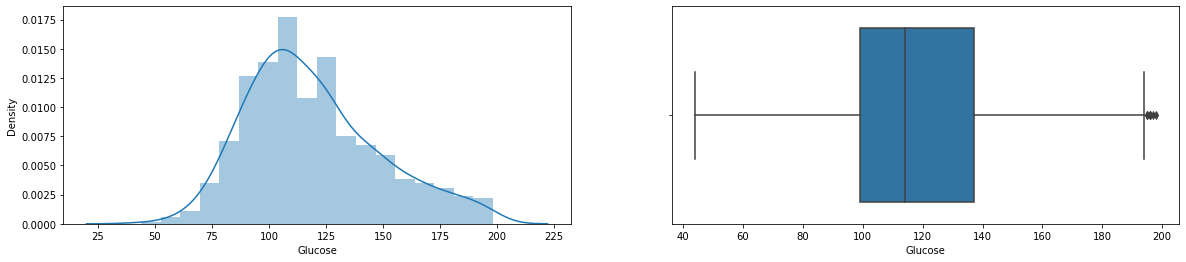

In [15]:
#Univariate analysis Glucose
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Glucose'])
f.add_subplot(1,2,2)
sns.boxplot(df['Glucose'])

- **We can see from the plot that density of the data is between 100 and 150, outliers is detected as well as value of zeroz**

In [16]:
df.SkinThickness.value_counts(normalize=True).to_frame().iloc[0,:]

SkinThickness    0.280125
Name: 0, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

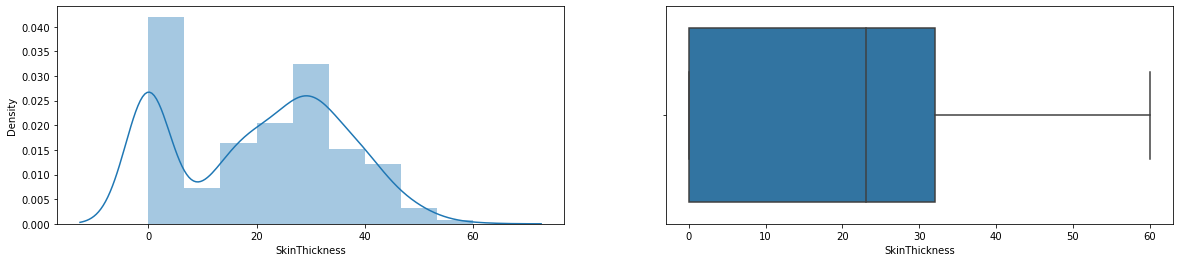

In [17]:
#Univariate analysis SkinThickness
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['SkinThickness'])
f.add_subplot(1,2,2)
sns.boxplot(df['SkinThickness'])

- **We can see from the plot that the density of the data is between 20 and 40 for skinthcikness also some samples looks like having skinthcikness of zeroz and some of 100 which doesnot make sense** 
- **The zeroz will be treated by replacing them with median and the other numbers by outliers treatment**

In [18]:
df.BMI.value_counts(normalize=True).to_frame().iloc[0,:]

BMI    0.018779
Name: 31.6, dtype: float64

<AxesSubplot:xlabel='BMI'>

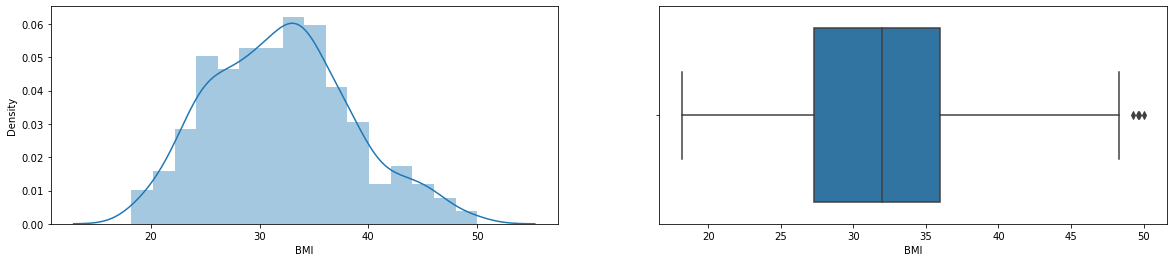

In [19]:
#Univariate analysis BMI
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['BMI'])
f.add_subplot(1,2,2)
sns.boxplot(df['BMI'])

- **The majority of the people data that we have have BMI between 30 and 40 the data contains upper and lower outliers**

In [20]:
df.Age.value_counts(normalize=True).to_frame().iloc[0,:]

Age    0.097027
Name: 22, dtype: float64

<AxesSubplot:xlabel='Age'>

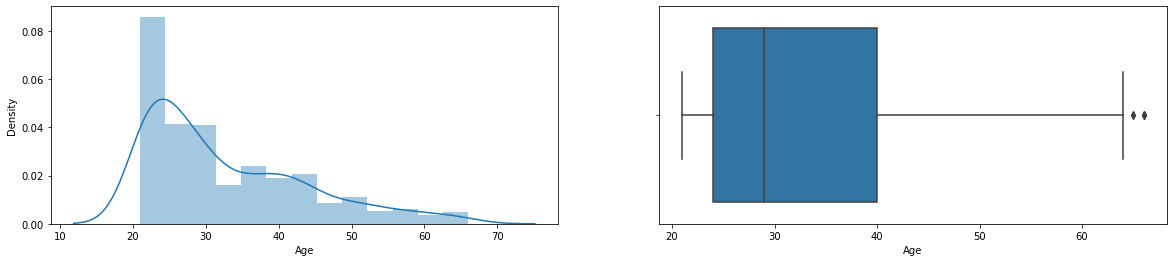

In [21]:
#Univariate analysis Age
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Age'])
f.add_subplot(1,2,2)
sns.boxplot(df['Age'])

- **The majority of the people ages collected are between 22 adn 30**
- **Maybe the study was subjected to youngs**

In [22]:
df.Pregnancies.value_counts(normalize=True).to_frame().iloc[0,:]

Pregnancies    0.178404
Name: 1, dtype: float64

<AxesSubplot:xlabel='Pregnancies'>

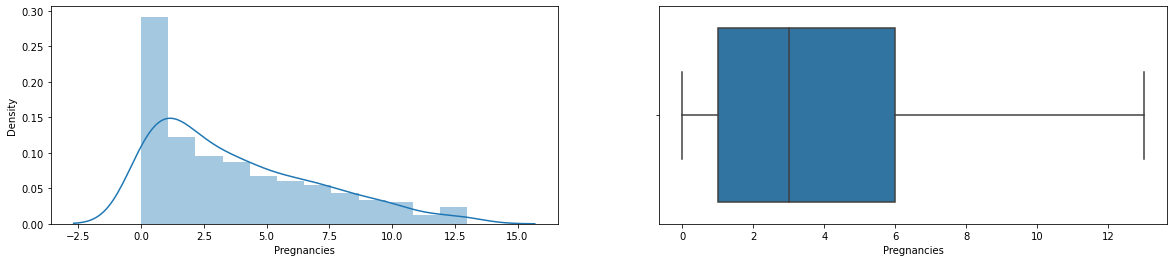

In [23]:
#Univariate analysis Pregnancies
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Pregnancies'])
f.add_subplot(1,2,2)
sns.boxplot(df['Pregnancies'])

- **As we see from the plot the density of the data is between zero and 5**

In [24]:
df.BloodPressure.value_counts(normalize=True).to_frame().iloc[0,:]

BloodPressure    0.078247
Name: 70, dtype: float64

In [25]:
df.Insulin.value_counts(normalize=True).to_frame().head().iloc[0,:]

Insulin    0.480438
Name: 0, dtype: float64

In [26]:
df.Glucose.value_counts(normalize=True).to_frame().iloc[0,:]

Glucose    0.023474
Name: 99, dtype: float64

In [27]:
df.SkinThickness.value_counts(normalize=True).to_frame().iloc[0,:]

SkinThickness    0.280125
Name: 0, dtype: float64

In [28]:
df.BMI.value_counts(normalize=True).to_frame().iloc[0,:]

BMI    0.018779
Name: 31.6, dtype: float64

**On the columns below, a value of zero does not make sense and thus indicates missing value:**

*SkinThickness*

*Insulin*



**The zeroz in the data are creating outliers so in this case treating the outliers before solving the zeroz issue will lead to loss in the data as we see the data is small so every row count**

In [29]:
df.Insulin.median()

37.0

In [30]:
Insulin_median=df[df['Insulin']!=0]['Insulin'].median()
Insulin_median

115.5

In [31]:
selected_col=['SkinThickness','Insulin']


for i in selected_col:
    median=df[df[i]!=0][i].median()
    df[i]=df[i].apply(lambda x: median if x==0 else x)
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,115.5,33.6,0.627,50,1
1,1,85,66,29.0,115.5,26.6,0.351,31,0
2,8,183,64,29.0,115.5,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
5,5,116,74,29.0,115.5,25.6,0.201,30,0


<AxesSubplot:>

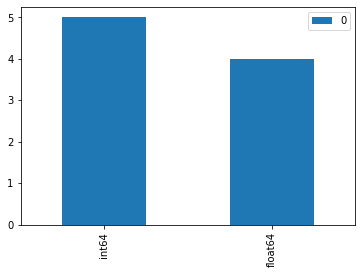

In [32]:
df.dtypes.value_counts().to_frame().plot(kind='bar')

<AxesSubplot:>

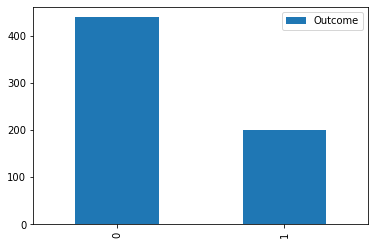

In [33]:
df['Outcome'].value_counts().to_frame().plot(kind='bar')

In [34]:
df['Outcome'].value_counts(normalize=True)

0    0.687011
1    0.312989
Name: Outcome, dtype: float64

**By looking at the balance of the data of the outcome column we do not have to use any SMOTE techniques**

## Correlation Analysis

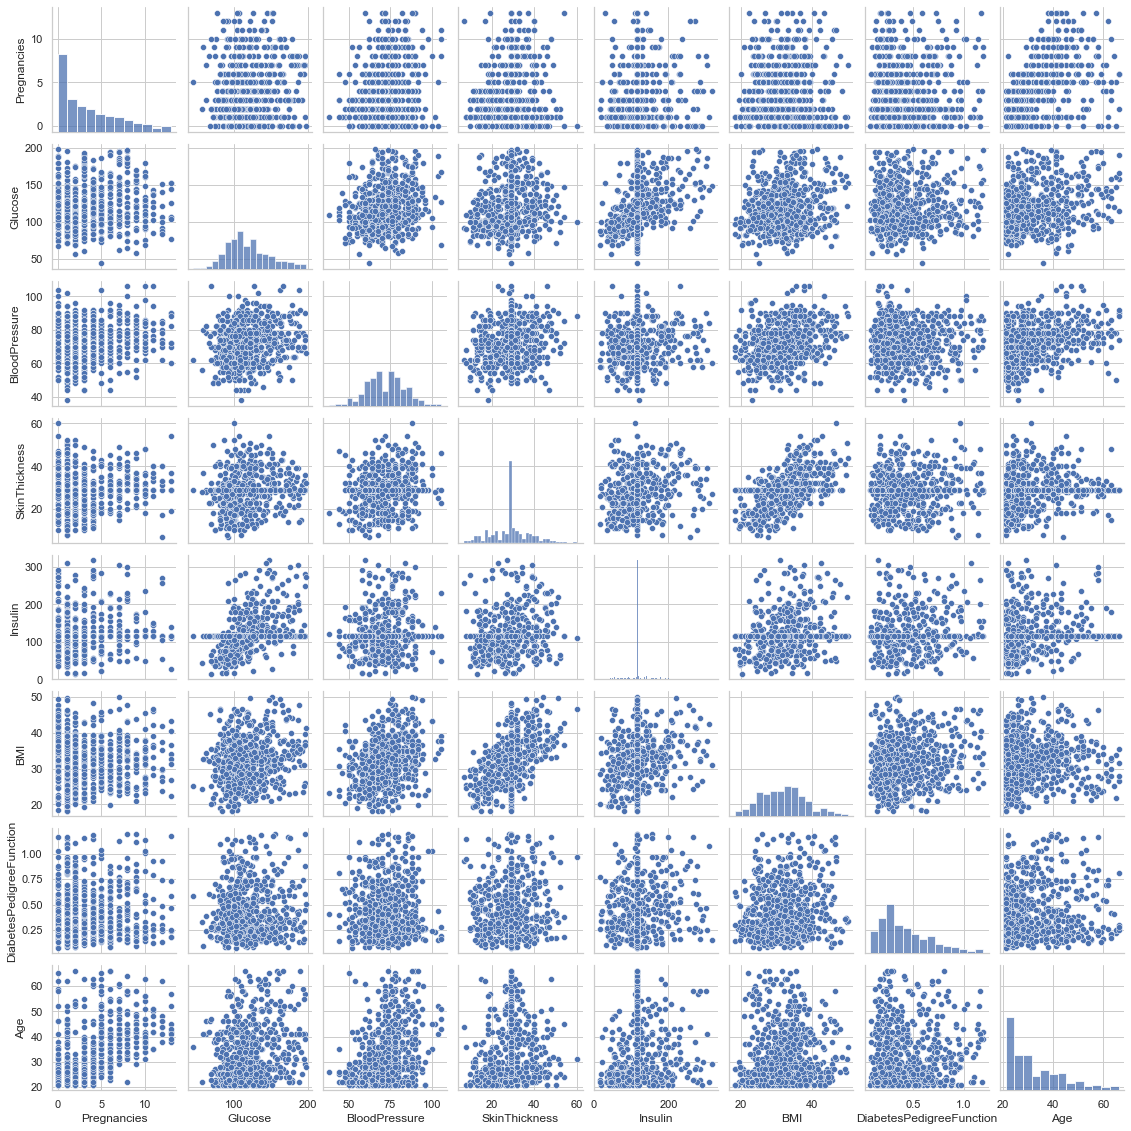

In [35]:
import seaborn as sns
sns.set(style='whitegrid')
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.pairplot(df[cols], size=2)

In [36]:
corr_values = df.corr().round(2)
corr_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.14,0.21,0.13,0.05,0.04,0.01,0.57,0.23
Glucose,0.14,1.00,0.24,0.14,0.42,0.19,0.07,0.29,0.49
BloodPressure,0.21,0.24,1.00,0.22,0.08,0.30,0.02,0.35,0.18
SkinThickness,0.13,0.14,0.22,1.00,0.18,0.56,0.05,0.14,0.18
Insulin,0.05,0.42,0.08,0.18,1.00,0.23,0.13,0.13,0.24
BMI,0.04,0.19,0.30,0.56,0.23,1.00,0.14,0.06,0.27
DiabetesPedigreeFunction,0.01,0.07,0.02,0.05,0.13,0.14,1.00,0.03,0.18
Age,0.57,0.29,0.35,0.14,0.13,0.06,0.03,1.00,0.26
Outcome,0.23,0.49,0.18,0.18,0.24,0.27,0.18,0.26,1.00


<AxesSubplot:>

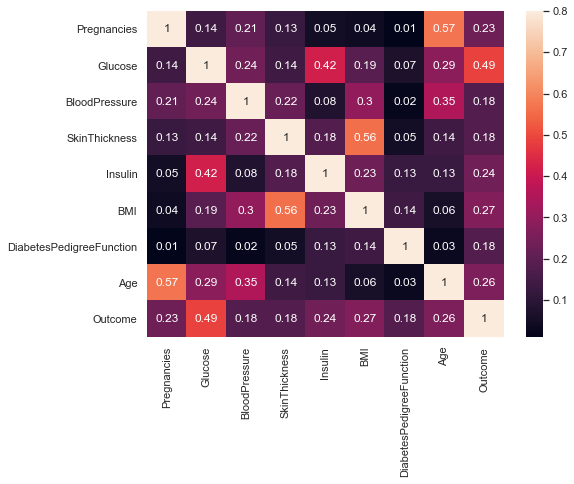

In [37]:
corr_values = df.corr().round(2)
corr_values
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_values, vmax=.8,annot=True)

**There is no high correlation among the features (all of them below 0.6)**

## Feature Engineering

*The correlation between the outcome and BloodPressure, SkinThcikness, and DiabetesPedigreeFunction are low 18% for all
then I will drop these 3 variables*

In [38]:
df.drop(['DiabetesPedigreeFunction','BloodPressure','SkinThickness'],inplace=True,axis=1)


In [39]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148,115.5,33.6,50,1
1,1,85,115.5,26.6,31,0
2,8,183,115.5,23.3,32,1
3,1,89,94.0,28.1,21,0
5,5,116,115.5,25.6,30,0


In [40]:
df.to_csv('diabetes_pre_processed.csv',index=False)

## Data Modeling

### Train-Test Split

In [41]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [42]:
x

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,115.5,33.6,50
1,1,85,115.5,26.6,31
2,8,183,115.5,23.3,32
3,1,89,94.0,28.1,21
5,5,116,115.5,25.6,30
...,...,...,...,...,...
763,10,101,180.0,32.9,63
764,2,122,115.5,36.8,27
765,5,121,112.0,26.2,30
766,1,126,115.5,30.1,47


In [43]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

### Scaling the Data

*the data should be scaled before using KNN*

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
transform_x=scaler.fit_transform(x)
transform_x

array([[ 0.67382449,  0.99135111, -0.12256829,  0.24797421,  1.56113222],
       [-0.86065109, -1.170674  , -0.12256829, -0.84085334, -0.15491181],
       [ 1.28761472,  2.19247617, -0.12256829, -1.35415776, -0.0645937 ],
       ...,
       [ 0.36692937,  0.06476892, -0.19501121, -0.90307206, -0.24522991],
       [-0.86065109,  0.23635821, -0.12256829, -0.29643957,  1.2901779 ],
       [-0.86065109, -0.89613113, -0.12256829, -0.24977553, -0.87745666]])

In [45]:
y.value_counts(normalize=True)

0    0.687011
1    0.312989
Name: Outcome, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(transform_x,y,test_size=0.25,random_state=45,stratify=y)

*I used Stratify to keep the ratio of y the same in the training and testing data*

In [47]:
y_train.value_counts(normalize=True)

0    0.686848
1    0.313152
Name: Outcome, dtype: float64

In [48]:
y_test.value_counts(normalize=True)

0    0.6875
1    0.3125
Name: Outcome, dtype: float64

In [49]:
def evaluate_model(y_test, y_pred, y_score, model_name):
    cm = metrics.confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_test, y_pred, digits=6))
    print ('Area under under ROC curve for {} Model'.format(model_name))
    print (metrics.roc_auc_score(y_test, y_score))
  

# Random Forest

In [50]:
# Fitting data to the model
rf = RandomForestClassifier().fit(x_train, y_train)

In [51]:
# Predicting using the test set
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)

## Evaluating the Model

In [52]:
evaluate_model(y_test, y_pred_rf, y_prob_rf[:, [1]], 'RandomForest')

Confusion Matrix for RandomForest Model
[[100  10]
 [ 27  23]]
Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0   0.787402  0.909091  0.843882       110
           1   0.696970  0.460000  0.554217        50

    accuracy                       0.768750       160
   macro avg   0.742186  0.684545  0.699049       160
weighted avg   0.759142  0.768750  0.753362       160

Area under under ROC curve for RandomForest Model
0.7898181818181819


In [53]:
print('Training set score: ' + str(rf.score(x_train,y_train)))
print('Test set score: ' + str(rf.score(x_test,y_test)))

Training set score: 1.0
Test set score: 0.76875


**The classification report of the RF algo. shows**
- specifity of 0.9 which means that the model identified a ratio of 0.9 of the non-diabetic samples as non-diabetic but the rest as diabetic
- sensitivity of 0.57 which means the model identifed a ratio of 0.48 of the diabetic samples as diabetic but the rest as non-diabetic

In [54]:
y_probs_positive_rf=y_prob_rf[:,1]
y_probs_positive_rf[:10]

array([0.19, 0.  , 0.41, 0.58, 0.95, 0.78, 0.51, 0.  , 0.  , 0.59])

In [55]:
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,y_probs_positive_rf)

# KNN

In [56]:
# Fitting data to the model
knn=KNeighborsClassifier().fit(x_train,y_train)

In [57]:
# Predicting using the test set
y_pred_knn = knn.predict(x_test)
y_prob_knn = knn.predict_proba(x_test)

## Evaluating the Model

In [58]:
evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNeighborsClassifier')

Confusion Matrix for KNeighborsClassifier Model
[[92 18]
 [22 28]]
Classification Report for KNeighborsClassifier Model
              precision    recall  f1-score   support

           0   0.807018  0.836364  0.821429       110
           1   0.608696  0.560000  0.583333        50

    accuracy                       0.750000       160
   macro avg   0.707857  0.698182  0.702381       160
weighted avg   0.745042  0.750000  0.747024       160

Area under under ROC curve for KNeighborsClassifier Model
0.7814545454545454


In [59]:
print('Training set score: ' + str(knn.score(x_train,y_train)))
print('Test set score: ' + str(knn.score(x_test,y_test)))

Training set score: 0.8329853862212944
Test set score: 0.75


In [60]:
y_probs_positive_knn=y_prob_knn[:,1]
y_probs_positive_knn[:10]

array([0. , 0. , 0.4, 0.4, 0.8, 0.8, 0.6, 0. , 0. , 0.6])

In [61]:
fpr_knn,tpr_knn,thresholds_knn=roc_curve(y_test,y_probs_positive_knn)

## SVC

In [62]:
# Fitting the data to the model
svm=SVC(probability=True).fit(x_train,y_train)

In [63]:
# Predicting using the test set
y_pred_svm = svm.predict(x_test)
y_prob_svm = svm.predict_proba(x_test)

## Evaluating the Model

In [64]:
evaluate_model(y_test, y_pred_svm, y_prob_svm[:, [1]], 'SVC')

Confusion Matrix for SVC Model
[[97 13]
 [26 24]]
Classification Report for SVC Model
              precision    recall  f1-score   support

           0   0.788618  0.881818  0.832618       110
           1   0.648649  0.480000  0.551724        50

    accuracy                       0.756250       160
   macro avg   0.718633  0.680909  0.692171       160
weighted avg   0.744877  0.756250  0.744839       160

Area under under ROC curve for SVC Model
0.7887272727272728


In [65]:
print('Training set score: ' + str(svm.score(x_train,y_train)))
print('Test set score: ' + str(svm.score(x_test,y_test)))

Training set score: 0.8058455114822547
Test set score: 0.75625


In [66]:
y_probs_positive_svm=y_prob_svm[:,1]
y_probs_positive_svm[:10]

array([0.17437039, 0.12380207, 0.67289992, 0.68524035, 0.81430033,
       0.81749798, 0.33838246, 0.12763884, 0.18249395, 0.8062894 ])

In [67]:
fpr_svm,tpr_svm,thresholds_svm=roc_curve(y_test,y_probs_positive_svm)

# Logistic Regression

In [68]:
# Fitting the data to the model
LR=LogisticRegression().fit(x_train,y_train)

In [69]:
# Predicting using the test set
y_pred_LR = LR.predict(x_test)
y_prob_LR = LR.predict_proba(x_test)

## Evaluating the Model

In [70]:
evaluate_model(y_test, y_pred_LR, y_prob_LR[:, [1]], 'LogisticRegression')

Confusion Matrix for LogisticRegression Model
[[97 13]
 [29 21]]
Classification Report for LogisticRegression Model
              precision    recall  f1-score   support

           0   0.769841  0.881818  0.822034       110
           1   0.617647  0.420000  0.500000        50

    accuracy                       0.737500       160
   macro avg   0.693744  0.650909  0.661017       160
weighted avg   0.722281  0.737500  0.721398       160

Area under under ROC curve for LogisticRegression Model
0.7974545454545454


In [71]:
print('Training set score: ' + str(LR.score(x_train,y_train)))
print('Test set score: ' + str(LR.score(x_test,y_test)))

Training set score: 0.7891440501043842
Test set score: 0.7375


In [72]:
y_probs_positive_LR=y_prob_LR[:,1]
y_probs_positive_LR[:10]

array([0.19898604, 0.03730156, 0.67783276, 0.63136441, 0.96403934,
       0.72891045, 0.27115125, 0.04655101, 0.01288605, 0.67547633])

In [73]:
fpr_LR,tpr_LR,thresholds_LR=roc_curve(y_test,y_probs_positive_LR)

# DecisionTreeClassifier

In [74]:
# Fitting the data to the model
CART=DecisionTreeClassifier().fit(x_train,y_train)

In [75]:
# Predicting using the test set
y_pred_CART = CART.predict(x_test)
y_prob_CART = CART.predict_proba(x_test)

## Evaluating the Model

In [76]:
evaluate_model(y_test, y_pred_CART, y_prob_CART[:, [1]], 'DecisionTreeClassifier')

Confusion Matrix for DecisionTreeClassifier Model
[[81 29]
 [24 26]]
Classification Report for DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0   0.771429  0.736364  0.753488       110
           1   0.472727  0.520000  0.495238        50

    accuracy                       0.668750       160
   macro avg   0.622078  0.628182  0.624363       160
weighted avg   0.678084  0.668750  0.672785       160

Area under under ROC curve for DecisionTreeClassifier Model
0.6281818181818182


In [77]:
print('Training set score: ' + str(CART.score(x_train,y_train)))
print('Test set score: ' + str(CART.score(x_test,y_test)))

Training set score: 1.0
Test set score: 0.66875


In [78]:
y_probs_positive_CART=y_prob_CART[:,1]
y_probs_positive_CART[:10]

array([1., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

In [79]:
fpr_CART,tpr_CART,thresholds_CART=roc_curve(y_test,y_probs_positive_CART)

### Area under the receiver operating characteristic curve:(ROC)

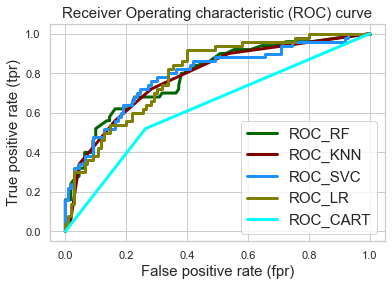

<Figure size 1296x864 with 0 Axes>

In [80]:
# creating a function to plot ROC curves
def plot_roc_curve(fpr,tpr):
    """
    
    ploting a ROC curve given the false positive rate (fpr)
    and the true positive rate (tpr) of a model.
    """
    
    #plot roc curves
    plt.plot(fpr_rf,tpr_rf,color='darkgreen',lw=3,label='ROC_RF')
    plt.plot(fpr_knn,tpr_knn,color='maroon',lw=3,label='ROC_KNN')
    plt.plot(fpr_svm,tpr_svm,color='dodgerblue',lw=3,label='ROC_SVC')
    plt.plot(fpr_LR,tpr_LR,color='olive',lw=3,label='ROC_LR')
    plt.plot(fpr_CART,tpr_CART,color='aqua',lw=3,label='ROC_CART')
   
    
    #customize the plot
    plt.xlabel('False positive rate (fpr)', fontsize=15)
    plt.ylabel('True positive rate (tpr)', fontsize=15)
    plt.title('Receiver Operating characteristic (ROC) curve', fontsize=15)
    plt.legend(fontsize=15)
    plt.figure(figsize=(18,12))
    plt.show()

plot_roc_curve(fpr_rf,tpr_rf)

## Analysis

**Among the 5 algorthims we used RandomForest and KNN had the best values during evalution
because we are dealing with healthcare problem we should take care of:**
- The TruePositive ratio the algorithm with the highest Sensitivity can be the best one in our problem the RandomForest got the highest value of 0.57 followed by the KNN with value of 0.56.
- Test score and Training score RandomForest got the best fit with values of 0.775 and 1 respectively but the KNN had very close vlaues.
- AUC: by comparing the area under curve we see that LR and RandomForest got the highest value but LR performance was not good as RandomForest and KNN on the other tests.
- RandomForestClassifier confusion matrix shows the least value for FalseNegative this value should be as low as possible when we are dealing with healthcare problems

 ***So i will perform tuning on KNN and RandomForest to see if we can get better results***
                                          


# Hyperparameters Tuning

### RandomForest Tuning

### RandomizedSearchCV

In [81]:
grid={'n_estimators':[10,100,200,500,1000,1200],
     'max_depth':[None,5,10,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2,4,6],
     'min_samples_leaf':[1,2,4]}

np.random.seed(42)

rf1=RandomForestClassifier(n_jobs=1)
# setup RandomizedSearchCV
rs_rf1=RandomizedSearchCV(estimator=rf1,param_distributions=grid,n_iter=10,cv=5,verbose=2)

# fitting the RandomSearchCV version of RandomForestClassifier
rs_rf1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [82]:
rs_rf1.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [83]:
# makeing predictions with the best hyperparameters (RF)
rs_rf_pred=rs_rf1.predict(x_test)
evaluate_model(y_test, y_pred_rf, y_prob_rf[:, [1]], 'RandomForest')
rs_rf_prob = rs_rf1.predict_proba(x_test)
# Evaluating the predictions
evaluate_model(y_test, rs_rf_pred, rs_rf_prob[:, [1]], 'RandomForest')

Confusion Matrix for RandomForest Model
[[100  10]
 [ 27  23]]
Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0   0.787402  0.909091  0.843882       110
           1   0.696970  0.460000  0.554217        50

    accuracy                       0.768750       160
   macro avg   0.742186  0.684545  0.699049       160
weighted avg   0.759142  0.768750  0.753362       160

Area under under ROC curve for RandomForest Model
0.7898181818181819
Confusion Matrix for RandomForest Model
[[96 14]
 [27 23]]
Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0   0.780488  0.872727  0.824034       110
           1   0.621622  0.460000  0.528736        50

    accuracy                       0.743750       160
   macro avg   0.701055  0.666364  0.676385       160
weighted avg   0.730842  0.743750  0.731753       160

Area under under ROC curve for RandomForest Model
0.7945454545454

In [84]:
# better recall value for RF after tuning
# the FP are same in both RF models, only ;little imrpovment in the ROC (higher AUC value)
# in the original model we had better results regarding False Positive (it was better on the original (smaller value 11))

### GridSearchCV 

In [85]:
grid_2={'n_estimators':[10,100,200],
     'max_depth':[None,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2],
     'min_samples_leaf':[2,4]}
np.random.seed(42)

rf1=RandomForestClassifier(n_jobs=1)
# setup GridSearchCV
gs_rf1=GridSearchCV(estimator=rf1,param_grid=grid_2,cv=5,verbose=2)

# fitting the GridSearchCV version of RandomForestClassifier
gs_rf1.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_es

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto,

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4], 'min_samples_split': [2],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [86]:
gs_rf1.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
# makeing predictions with the best hyperparameters (RF)
gs_rf_pred=gs_rf1.predict(x_test)
gs_rf_prob = gs_rf1.predict_proba(x_test)
# Evaluating the predictions
evaluate_model(y_test, gs_rf_pred,gs_rf_prob[:, [1]], 'RandomForest')

Confusion Matrix for RandomForest Model
[[97 13]
 [24 26]]
Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0   0.801653  0.881818  0.839827       110
           1   0.666667  0.520000  0.584270        50

    accuracy                       0.768750       160
   macro avg   0.734160  0.700909  0.712048       160
weighted avg   0.759470  0.768750  0.759965       160

Area under under ROC curve for RandomForest Model
0.7894545454545454


In [88]:
# After trying different methods of Tuning for RandomForestClassifier the default parameter gave the best model

## KNN tuning

In [89]:
param_grid = {'n_neighbors':np.arange(1,50)}
gs_knn = KNeighborsClassifier()
gs_knn_cv= GridSearchCV(gs_knn,param_grid,cv=5)
gs_knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [90]:
#lets evaluate the tuned KNN model
y_pred_knn_gs = gs_knn_cv.predict(x_test)
y_prob_knn_gs = gs_knn_cv.predict_proba(x_test)
y_probs_positive_knn_gs=y_prob_knn_gs[:,1]
y_probs_positive_knn_gs[:10]

array([0.26086957, 0.        , 0.52173913, 0.52173913, 0.82608696,
       0.73913043, 0.52173913, 0.        , 0.04347826, 0.60869565])

In [91]:
evaluate_model(y_test, y_pred_knn_gs,y_prob_knn_gs[:, [1]], 'KNN')

Confusion Matrix for KNN Model
[[97 13]
 [21 29]]
Classification Report for KNN Model
              precision    recall  f1-score   support

           0   0.822034  0.881818  0.850877       110
           1   0.690476  0.580000  0.630435        50

    accuracy                       0.787500       160
   macro avg   0.756255  0.730909  0.740656       160
weighted avg   0.780922  0.787500  0.781989       160

Area under under ROC curve for KNN Model
0.7889090909090909


In [92]:
gs_knn_cv.best_params_

{'n_neighbors': 23}

# Model Selection

- **After evaluating many models and tunning them the rs_rf1 model gave the best result because it has value of 10 for the FalsePositive which is the lowest(when working on healthcare related model the FP value should be as min as possible) and gave accuarcy of 74% and AUC of 0.794**
- **The model we developed is not the best that we should use in healthcare industry with such accuarcy but this may be result of the small data we have I think we can get better result with more data**

## Saving the Model

In [95]:
# KNN with n_neighbors=23 gave the best result 
import pickle

file_save=open('rs_rf1.pkl','wb')
pickle.dump(rf,file_save)
file_save.close()



In [96]:
model_rf=open('rs_rf1.pkl','rb')

loaded_rf=pickle.load(model_rf)